In [33]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import numpy as np
import cv2

In [34]:
inputs = Input((256,256,3))
x = Flatten()(inputs)
x = Dense(10,activation='relu')(x)
x = Dense(12,activation='relu')(x)
x = Dense(16,activation='relu')(x)
x = Dense(24,activation='relu')(x)
x = Dense(18,activation='relu')(x)
x = Dense(15,activation='relu')(x)
x = Dense(12,activation='relu')(x)
outputs = Dense(10,activation='softmax', name='OutputLayer')(x)
model = Model(inputs, outputs, name='FCNN')
model.summary()

Model: "FCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │     1,966,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 18)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 15)             │           285 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 12)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,967,895 (7.51 MB)

 Trainable params: 1,967,895 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
inputs = Input((256,256,3))
x = Conv2D(filters=4,kernel_size=(9,9),padding='same',activation='relu')(inputs)
x = Conv2D(filters=8,kernel_size=(7,7),padding='same',activation='relu')(x)
x = Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='sigmoid')(x)
x = Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu')(x)
x = Conv2D(filters=4, kernel_size=(5,5),padding='same',activation='relu')(x)
x = Flatten()(x)
outputs = Dense(10,activation='sigmoid',name='OutputLayer')(x)
model = Model(inputs,outputs,name='CNN')
model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 256, 256, 4)    │           976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 256, 256, 8)    │         1,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 256, 256, 16)   │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 256, 256, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 256, 256, 4)    │           804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │     2,621,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,629,182 (10.03 MB)

 Trainable params: 2,629,182 (10.03 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def display_image(img_set, title_set):
    n = len(title_set)
    for i in range(n):
        plt.subplot(3,3,i+1)
        plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i])
    plt.show()
    plt.close()

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


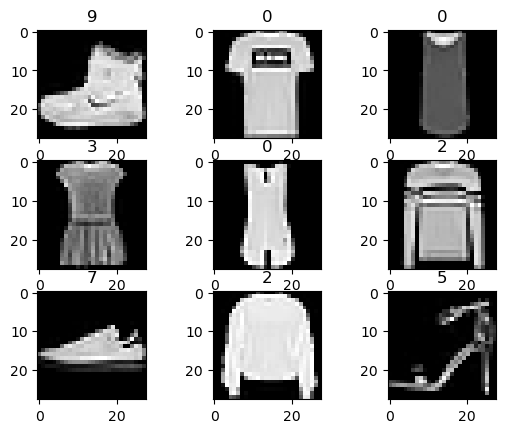

In [38]:
(trainX,trainY),(testX,testY) = load_data()

print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

display_image(trainX[:9],trainY[:9])

In [39]:
print(trainX.shape)

(60000, 28, 28)


In [40]:
trainX = trainX.reshape(-1,28,28,1)/256.0
testX  = testX.reshape(-1,28,28,1)/256.0


trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

print(trainY[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
inputs = Input((28,28,1))
x = Conv2D(filters=4,kernel_size=(9,9),padding='same',activation='relu')(inputs)
x = Conv2D(filters=8,kernel_size=(7,7),padding='same',activation='relu')(x)
x = Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='sigmoid')(x)
x = Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu')(x)
x = Conv2D(filters=4, kernel_size=(5,5),padding='same',activation='relu')(x)
x = Flatten()(x)
outputs = Dense(10,activation='sigmoid',name='OutputLayer')(x)
model = Model(inputs,outputs,name='CNN')
model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 4)      │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 8)      │         1,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 4)      │           804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,454 (150.21 KB)

 Trainable params: 38,454 (150.21 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX,trainY,batch_size=512,validation_split=0.1,epochs=5)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.3746 - loss: 1.6795 - val_accuracy: 0.7073 - val_loss: 0.7504
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.7586 - loss: 0.6495 - val_accuracy: 0.7935 - val_loss: 0.5293
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.8204 - loss: 0.4977 - val_accuracy: 0.8425 - val_loss: 0.4386
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.8494 - loss: 0.4201 - val_accuracy: 0.8517 - val_loss: 0.4015
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.8623 - loss: 0.3772 - val_accuracy: 0.8743 - val_loss: 0.3619


In [43]:
model.evaluate(testX,testY)

predictY = model.predict(testX)

print("OriginalY    PredictedY")
print("=========    ==========")
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8633 - loss: 0.3886
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
OriginalY    PredictedY
=========    ==========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


In [44]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.datasets.cifar10 import load_data

In [45]:
mobilenet_model = mobilenet.MobileNet(weights='imagenet',include_top=False, input_shape=(32,32,3))
inputs = mobilenet_model.input
x = mobilenet_model.output


x = Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(x)
x = Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(x)

x = Flatten()(x)
x = Dense(15,activation='relu')(x)

output = Dense(10,activation='softmax')(x)
model = Model(inputs,output,name='MobileNet')
# model.summary()

/tmp/ipykernel_80564/1604811807.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = mobilenet.MobileNet(weights='imagenet',include_top=False, input_shape=(32,32,3))


(50000, 32, 32, 3) (50000, 1)


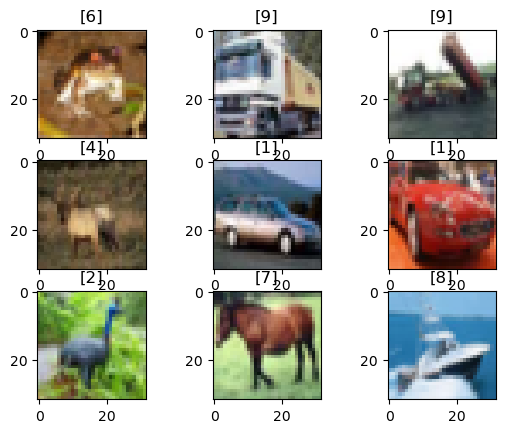

In [46]:
(trainX,trainY),(testX,testY) = load_data()
print(trainX.shape, trainY.shape)
display_image(trainX[:9],trainY[:9])

In [47]:
trainX = trainX/256.0
testX = testX/256.0

trainX = np.squeeze(trainX)
testX = np.squeeze(testX)
print(trainX.shape,testX.shape)

trainY = to_categorical(trainY,num_classes=10)
testY = to_categorical(testY, num_classes=10)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [48]:
mobilenet_model = mobilenet.MobileNet(weights=None,include_top=False,input_shape=(32,32,3))
inputs = mobilenet_model.input
x = mobilenet_model.output

x = Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu')(x)
x = Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu')(x)

x = Flatten()(x)
x = Dense(16,activation='relu')(x)
outputs = Dense(10,activation='softmax',name='OutputLayer')(x)
model = Model(inputs,outputs,name='mobilenet_cifar10')
# model.summary()

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX,trainY,batch_size=128,validation_split=0.1,validation_data=(testX,testY),epochs=10)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 221ms/step - accuracy: 0.2015 - loss: 2.0707 - val_accuracy: 0.1000 - val_loss: 2.4313
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 92s 235ms/step - accuracy: 0.3935 - loss: 1.5937 - val_accuracy: 0.3157 - val_loss: 2.0624
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 239ms/step - accuracy: 0.4958 - loss: 1.3928 - val_accuracy: 0.4842 - val_loss: 1.6737
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 239ms/step - accuracy: 0.5582 - loss: 1.2336 - val_accuracy: 0.4357 - val_loss: 1.8076
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 238ms/step - accuracy: 0.6025 - loss: 1.1173 - val_accuracy: 0.5539 - val_loss: 1.4613
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 233ms/step - accuracy: 0.6464 - loss: 1.0126 - val_accuracy: 0.5879 - val_loss: 1.3495
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 237ms/step - accuracy: 0.6831 - loss: 0.9145 - val_accuracy: 0.6158 - val_loss: 1.2383
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 234ms/step - accuracy: 0.7125 - loss: 0

In [50]:
model.evaluate(testX,testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6509 - loss: 1.2257


[1.2327772378921509, 0.6445000171661377]

In [52]:
for layer in model.layers[:-4]:
    layer.trainable = False
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX,trainY,validation_split=0.1,batch_size=32,epochs=5)
model.evaluate(testX,testY)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7565 - loss: 0.7301 - val_accuracy: 0.7662 - val_loss: 0.6843
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.7605 - loss: 0.7119 - val_accuracy: 0.7690 - val_loss: 0.6933
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.7572 - loss: 0.7155 - val_accuracy: 0.7716 - val_loss: 0.6870
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.7639 - loss: 0.7039 - val_accuracy: 0.7688 - val_loss: 0.6803
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.7613 - loss: 0.7065 - val_accuracy: 0.7692 - val_loss: 0.6851
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6606 - loss: 1.0988


[1.1154993772506714, 0.6535999774932861]

In [ ]:
for layer in model.layers[:-4]:
    layer.trainable = False
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX,trainY,validation_split=0.1,batch_size=32,epochs=5)
model.evaluate(testX,testY)